# Uber Rides Data Analysis

In [2]:
# Importing pandas library for data manipulation
import pandas as pd

# Importing numpy library for numerical computations
import numpy as np

# Importing matplotlib.pyplot for data visualization
import matplotlib.pyplot as plt

# Importing seaborn for enhancing the visual aesthetics of plots
import seaborn as sns


In [4]:
# Load the Uber dataset into a pandas DataFrame for analysis
dataset = pd.read_csv("uber dataset.csv")

# Display the first few rows of the dataset to understand its structure and contents
dataset.head()


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [6]:
# Display information about the dataset including data types, non-null counts, and memory usage
dataset.info()  # Providing insights into the structure and composition of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Preprocessing

* Since we've identified numerous null values in the PURPOSE column, we'll fill these with the keyword 'NOT'.

* Alternatively, other strategies can be explored for handling null values.


In [7]:
# Fill missing values in the 'PURPOSE' column with "NOT" as a placeholder
dataset['PURPOSE'].fillna("NOT", inplace=True)  # Filling missing purpose with placeholder "NOT"


In [8]:
# Converting START_DATE and END_DATE to datetime format for future analysis

# Transform the 'START_DATE' column to datetime format, gracefully handling any errors
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')

# Modify the 'END_DATE' column to datetime format, gracefully managing any errors that may occur
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors='coerce')


First, the START_DATE will be separated into separate columns for date and time. Then, the time portion will be categorized into four distinct categories: Morning, Afternoon, Evening, and Night

In [9]:
# Extracting date from the START_DATE column
dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date

# Extracting hour from the START_DATE column
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

# Categorizing the time into day and night periods
dataset['day-night'] = pd.cut(x=dataset['time'],
                              bins=[0, 10, 15, 19, 24],
                              labels=['Morning', 'Afternoon', 'Evening', 'Night'])


After creating the new columns, we can proceed to remove any rows containing null values.

In [10]:
# Dropping rows with missing values to ensure data integrity
dataset.dropna(inplace=True)  # Cool: "Cleaning up the dataset by removing any missing values!"


In [11]:
# Removing duplicate entries from the dataset to ensure data integrity and avoid redundancy
dataset.drop_duplicates(inplace=True)  # Keepin' it clean by dropping duplicates! 🧹✨


# Data Visualization

* In this section, we aim to gain insights and compare across all columns.

* Let's kick things off by examining the unique values in columns with object datatype.


In [12]:
# Identifying columns with data type 'object' (typically categorical variables)
obj = (dataset.dtypes == 'object')

# Extracting the list of columns with object data type
object_cols = list(obj[obj].index)

# Initializing a dictionary to store unique values count for each categorical column
unique_values = {}

# Looping through each categorical column to find unique values count
for col in object_cols:
    unique_values[col] = dataset[col].unique().size

# Displaying the dictionary containing unique values count for each categorical column
unique_values


{'CATEGORY': 2, 'START': 175, 'STOP': 186, 'PURPOSE': 11, 'date': 291}

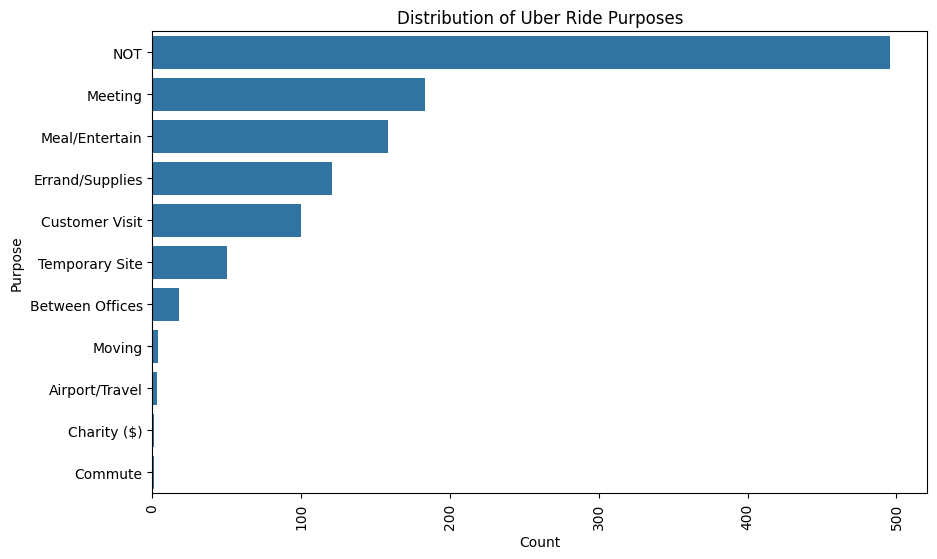

In [14]:
# Set the figure size for better visualization
plt.figure(figsize=(10, 6))

# Plotting the count of ride purposes using seaborn's countplot
sns.countplot(y=dataset['PURPOSE'], order=dataset['PURPOSE'].value_counts().index)

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Distribution of Uber Ride Purposes')

# Rotating y-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


# Histogram of Ride Distances

A histogram will visualize the distribution of ride distances, helping to understand the range and frequency of distances traveled.



<ipython-input-21-f0cbcb699944>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


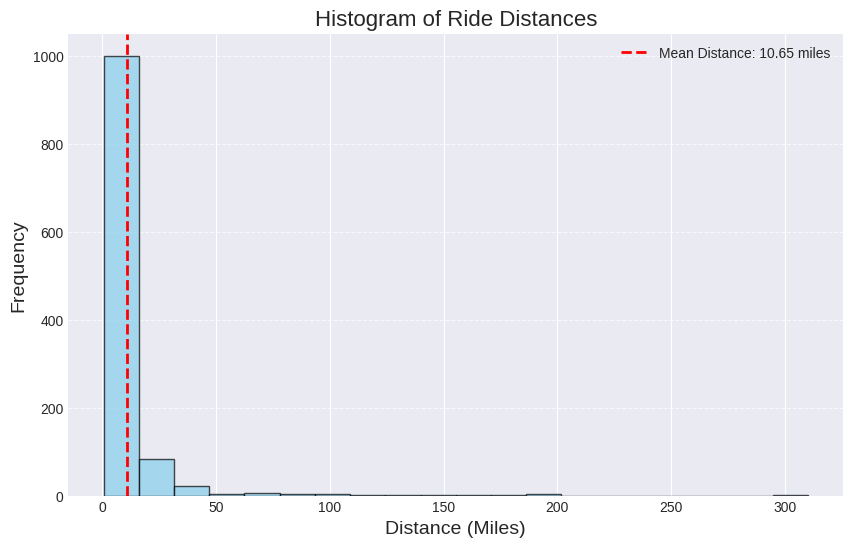

In [21]:
# Set the style
plt.style.use('seaborn-darkgrid')

# Plotting the histogram of ride distances
plt.figure(figsize=(10, 6))
plt.hist(dataset['MILES'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('Distance (Miles)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Ride Distances', fontsize=16)

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a vertical line for mean distance
mean_distance = dataset['MILES'].mean()
plt.axvline(mean_distance, color='red', linestyle='--', linewidth=2, label=f'Mean Distance: {mean_distance:.2f} miles')
plt.legend()

# Display the plot
plt.show()

# Bar Chart of Start Locations

This graph will display the frequency of rides starting from different locations.


<ipython-input-20-00a9274dc890>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=dataset['START'],


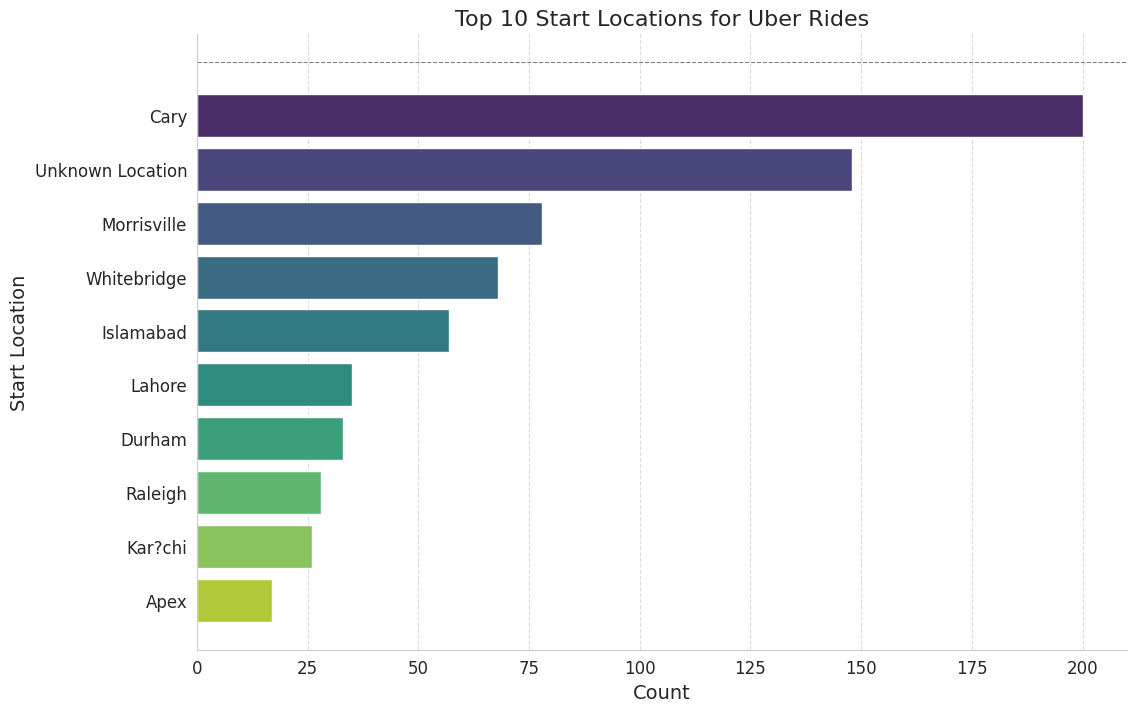

In [20]:
# Set style
sns.set_style("whitegrid")

# Plotting the bar chart with customized aesthetics
plt.figure(figsize=(12, 8))
sns.countplot(y=dataset['START'],
              order=dataset['START'].value_counts().index[:10],
              palette="viridis")  # Using Viridis color palette for a visually appealing look

# Adding labels and title with larger fonts
plt.xlabel('Count', fontsize=14)
plt.ylabel('Start Location', fontsize=14)
plt.title('Top 10 Start Locations for Uber Rides', fontsize=16)

# Rotating y-axis labels for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding a background grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adding a horizontal line to separate the title
plt.axhline(y=-1, color='grey', linestyle='--', linewidth=0.8)

# Removing spines
sns.despine()

# Show plot
plt.show()

# Now, we will compare the purposes of Uber rides across two different categories.

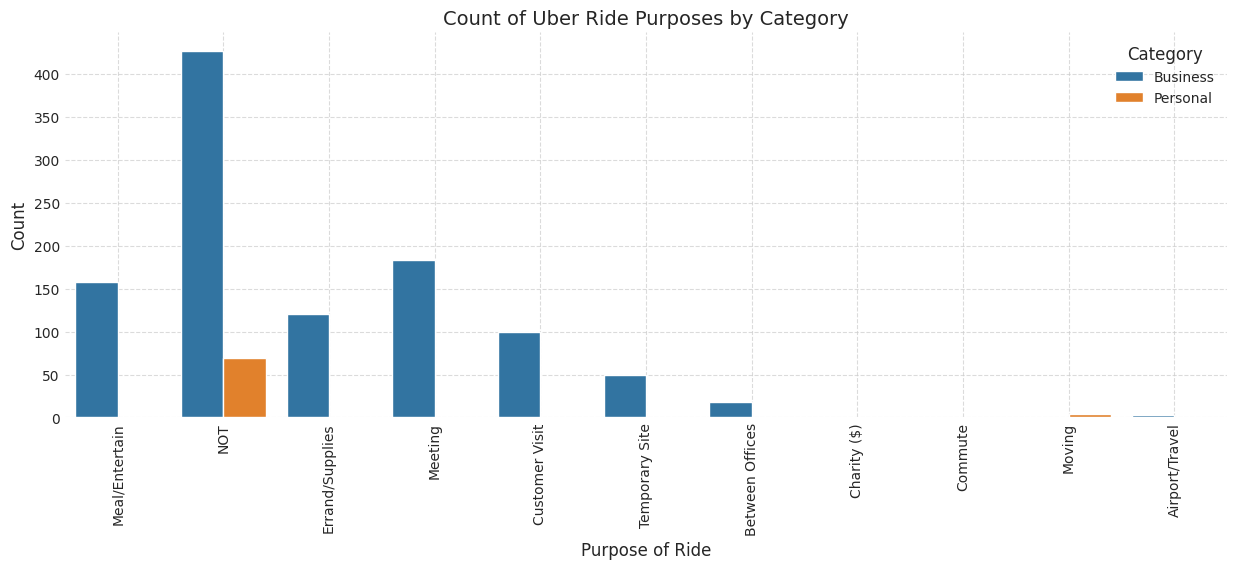

In [24]:
# Set the background style
sns.set_style("whitegrid")

# Set the figure size for better visualization
plt.figure(figsize=(15, 5))

# Define custom colors for each category
colors = ['#1f77b4', '#ff7f0e']

# Plotting the count of Uber ride purposes with respect to categories
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY', palette=colors)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adding labels and title
plt.xlabel('Purpose of Ride', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Uber Ride Purposes by Category', fontsize=14)

# Add gridlines to the plot
plt.grid(True, linestyle='--', alpha=0.7)

# Customize legend
plt.legend(title='Category', title_fontsize='12', fontsize='10')

# Show plot
plt.show()

- Ride Categories: The majority of rides in the dataset belong to the "Business" category, indicating that Uber is primarily used for business-related purposes.

- Ride Purposes: The most common purposes of Uber rides include "Meeting", "Meal/Entertain", "Customer Visit", and "Errand/Supplies". This suggests that Uber is frequently used for various activities such as business meetings, dining out, and running errands.

- Ride Distances: The distribution of ride distances varies, with some rides being short (e.g., under 5 miles) and others being longer (e.g., over 10 miles). This indicates that Uber is used for both short-distance and long-distance travel.

- Start and Stop Locations: The dataset contains rides starting and ending at various locations, with certain locations appearing more frequently than others. This could reflect areas with high population density or business activity.

- Duration of Rides: The duration of rides varies, with some rides being shorter and others being longer. Factors such as traffic conditions and distance traveled likely influence ride durations.